In [3]:
import pandas as pd

# 加载数据
file_path = '/home/wmy/Downloads/ecommerce_product_recommendation_collaborative.csv'
data = pd.read_csv(file_path)

# 查看数据的前几行
print(data.head())

   Unnamed: 0 User_ID  Age  Gender  Location  Income   Interests  \
0           0      #1   56    Male  Suburban   38037      Sports   
1           1      #2   46  Female     Rural  103986  Technology   
2           2      #3   32  Female  Suburban  101942      Sports   
3           3      #4   60  Female  Suburban   71612     Fashion   
4           4      #5   25    Male  Suburban   49725      Travel   

   Last_Login_Days_Ago  Purchase_Frequency  Average_Order_Value  \
0                    5                   7                   18   
1                   15                   7                  118   
2                   28                   1                  146   
3                   18                   3                  163   
4                    2                   5                  141   

   Total_Spending Product_Category_Preference  Time_Spent_on_Site_Minutes  \
0            2546                       Books                         584   
1             320                 

In [6]:
# 查看数据的基本信息
print(data.info())

# 查看数据的描述性统计
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
Unnamed: 0                     1000 non-null int64
User_ID                        1000 non-null object
Age                            1000 non-null int64
Gender                         1000 non-null object
Location                       1000 non-null object
Income                         1000 non-null int64
Interests                      1000 non-null object
Last_Login_Days_Ago            1000 non-null int64
Purchase_Frequency             1000 non-null int64
Average_Order_Value            1000 non-null int64
Total_Spending                 1000 non-null int64
Product_Category_Preference    1000 non-null object
Time_Spent_on_Site_Minutes     1000 non-null int64
Pages_Viewed                   1000 non-null int64
Newsletter_Subscription        1000 non-null bool
dtypes: bool(1), int64(9), object(5)
memory usage: 110.4+ KB
None
        Unnamed: 0          Age         Income  Last_Login_

In [7]:
# 检查缺失值
missing_values = data.isnull().sum()
print("缺失值统计：")
print(missing_values)

缺失值统计：
Unnamed: 0                     0
User_ID                        0
Age                            0
Gender                         0
Location                       0
Income                         0
Interests                      0
Last_Login_Days_Ago            0
Purchase_Frequency             0
Average_Order_Value            0
Total_Spending                 0
Product_Category_Preference    0
Time_Spent_on_Site_Minutes     0
Pages_Viewed                   0
Newsletter_Subscription        0
dtype: int64


In [8]:
# 检查重复值
duplicates = data.duplicated().sum()
print("重复值数量：", duplicates)

重复值数量： 0


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 检查数值型列的异常值（以 'Average_Order_Value' 为例）
sns.boxplot(x=data['Average_Order_Value'])
plt.title('Boxplot of Average Order Value')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# 删除缺失值
data = data.dropna()

# 或者填充缺失值（例如用中位数填充）
# data = data.fillna(data.median())

In [12]:
# 删除重复值
data = data.drop_duplicates()

In [13]:
from scipy import stats

# 使用 Z-score 方法处理异常值（以 'Average_Order_Value' 为例）
z_scores = stats.zscore(data['Average_Order_Value'])
data = data[(z_scores < 3) & (z_scores > -3)]

In [14]:
# 计算基本统计量
print(data.describe())

        Unnamed: 0          Age         Income  Last_Login_Days_Ago  \
count  1000.000000  1000.000000    1000.000000          1000.000000   
mean    499.500000    40.986000   81304.732000            15.586000   
std     288.819436    13.497852   37363.972753             8.205604   
min       0.000000    18.000000   20155.000000             1.000000   
25%     249.750000    29.000000   48715.500000             8.000000   
50%     499.500000    42.000000   81042.000000            16.000000   
75%     749.250000    52.000000  112694.500000            23.000000   
max     999.000000    64.000000  149951.000000            29.000000   

       Purchase_Frequency  Average_Order_Value  Total_Spending  \
count         1000.000000          1000.000000     1000.000000   
mean             4.631000           104.039000     2552.957000   
std              2.837762            54.873569     1420.985048   
min              0.000000            10.000000      112.000000   
25%              2.000000     

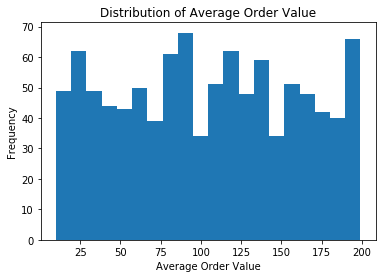

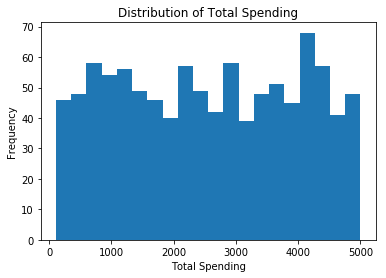

In [15]:
# 绘制 'Average_Order_Value' 的分布图
plt.hist(data['Average_Order_Value'], bins=20)
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Average Order Value')
plt.show()

# 绘制 'Total_Spending' 的分布图
plt.hist(data['Total_Spending'], bins=20)
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spending')
plt.show()